In [42]:
import matplotlib.pyplot as plt
import math

In [43]:
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [complex(0, -2 * i * math.pi / N) for i in range(N // 2)]
    for i in range(N // 2):
        t = even[i]
        even[i] = t + odd[i] * T[i]
        odd[i] = t - odd[i] * T[i]
    return even + odd

In [44]:
# Generate a sample signal
fs = 1000  # Sampling frequency
t = [i/fs for i in range(fs)]  # Time vector
f = 5  # Frequency of the signal
signal = [math.sin(2 * math.pi * f * i) for i in t]

In [45]:
# Perform 1D FFT
fft_result = fft(signal)
freq = [i * fs / len(fft_result) for i in range(len(fft_result))]

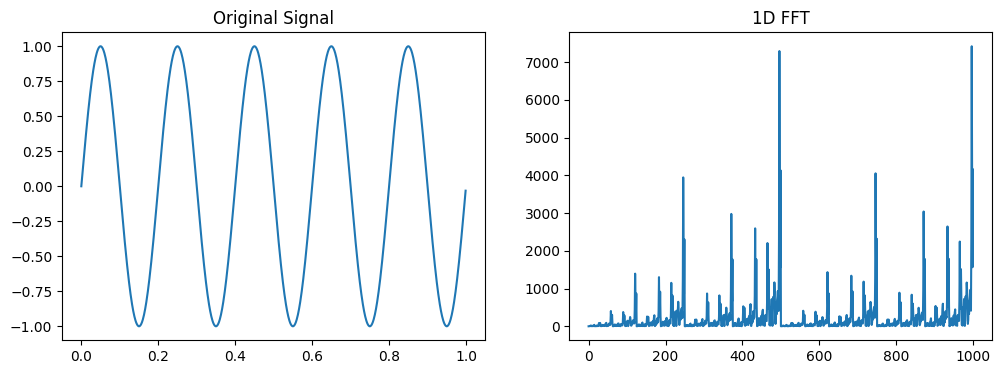

In [46]:
# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t, signal)
plt.title('Original Signal')
plt.subplot(122)
plt.plot(freq, np.abs(fft_result))
plt.title('1D FFT')
plt.show()